# **인공 신경망**

In [ ]:
# 사용할 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

## **비선형 방정식을 사용하여 샘플링 진행하기**


In [ ]:
def my_function(x1, x2, x3) :
  return np.power(x1,2) + 4*np.power(x2,2) - 10*x3

In [ ]:
delta_x = 1e-3
x1, x2, x3 = np.arange(2, 6, delta_x), np.arange(-4, 0, delta_x), np.arange(0, 4, delta_x)

In [ ]:
y = my_function(x1, x2, x3)

### 샘플들의 히스토그램 (분포) 시각화

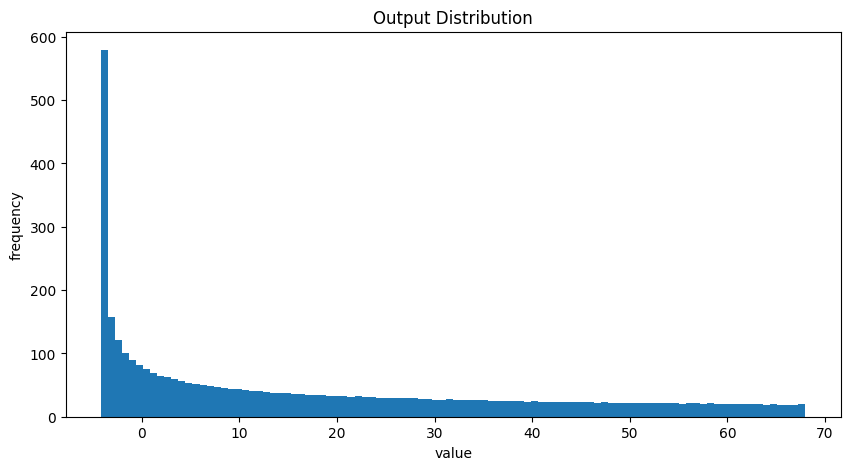

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(y, bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.title("Output Distribution")
plt.show()

## **활성화 함수 (Activation Function)**

### 시드 (Seed) 고정

In [ ]:
np.random.seed(42)

### **Sigmoid Function**

In [ ]:
def Sigmoid(input:np.array)->np.array :
  # 코드를 작성해주세요
  output = np.power(1 + np.exp(-input), -1)
  return output

#### 정답

In [ ]:
def Sigmoid(input:np.array)->np.array :
  output = np.power(1 + np.exp(-input), -1)
  return output

### Random Sampling을 통한 입력 값 생성

In [ ]:
num_sample = 25

In [ ]:
random_var = np.random.randn((num_sample))

### 입력 값과 Sigmoid Function을 통과한 값 비교

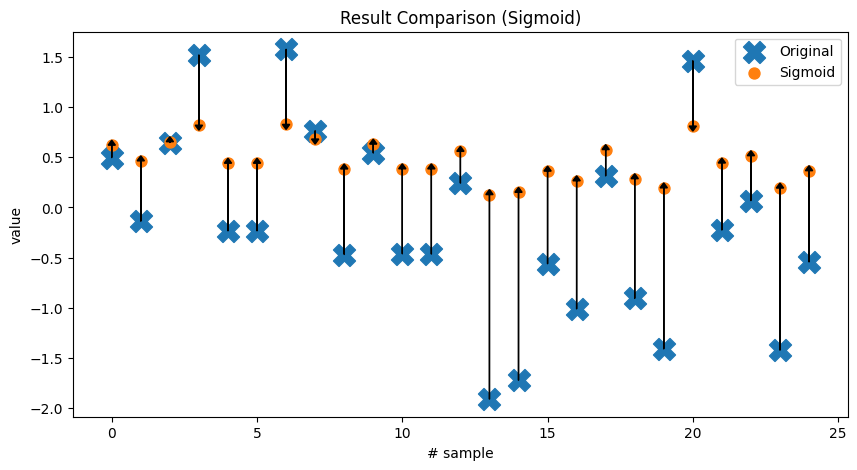

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(num_sample), random_var, label="Original", marker="X", s=250)
plt.scatter(np.arange(num_sample), Sigmoid(random_var), label="Sigmoid", marker=".", s=250)

for i in range(num_sample) :
  delta_y = Sigmoid(random_var[i]) - random_var[i]
  if delta_y != 0 :
    plt.arrow(i, random_var[i], 0, delta_y, head_width=0.25, head_length=0.05, fc="k", ec="k")

plt.xlabel("# sample")
plt.ylabel("value")
plt.title("Result Comparison (Sigmoid)")
plt.legend(loc="best")
plt.show()

### **Rectified Linear Unit (ReLU) Function**

In [ ]:
def ReLU(input:np.array)->np.array :
  # 코드를 작성해주세요
  output = np.where(input > 0, input, 0)
  return output

#### 정답

In [ ]:
def ReLU(input:np.array)->np.array :
  output = np.where(input > 0, input, 0)
  return output

### Random Sampling을 통한 입력 값 생성

In [ ]:
num_sample = 25

In [ ]:
random_var = np.random.randn((num_sample))

### 입력 값과 Sigmoid Function을 통과한 값 비교

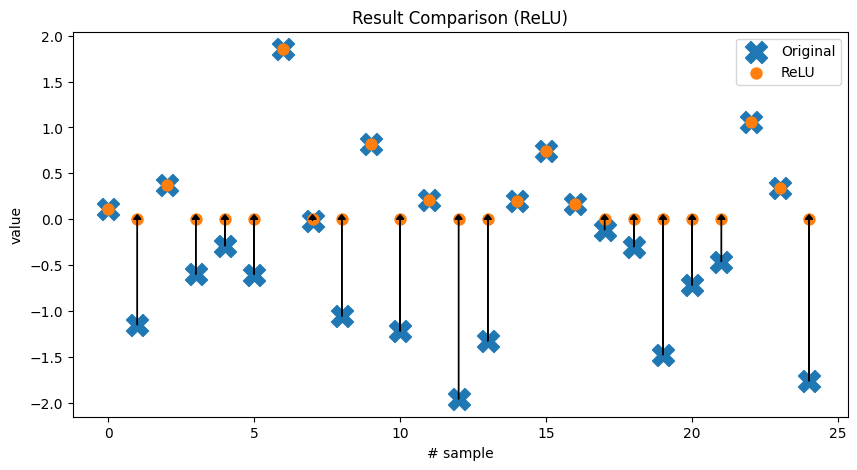

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(num_sample), random_var, label="Original", marker="X", s=250)
plt.scatter(np.arange(num_sample), ReLU(random_var), label="ReLU", marker=".", s=250)

for i in range(num_sample) :
  delta_y = ReLU(random_var[i]) - random_var[i]
  if delta_y != 0 :
    plt.arrow(i, random_var[i], 0, delta_y, head_width=0.25, head_length=0.05, fc="k", ec="k")

plt.xlabel("# sample")
plt.ylabel("value")
plt.title("Result Comparison (ReLU)")
plt.legend(loc="best")
plt.show()

## **2-Layer MLP 모델 생성**

### 훈련 과정 Progress 시각화를 위한 TQDM 라이브러리 사용

In [ ]:
from tqdm import tqdm

### 2-Layer MLP 모델 Class (청사진) 생성

In [ ]:
class TwoLayerNeuralNetwork :
  def __init__(self, input_dim:int, hidden_dim:int, output_dim:int, seed:int) :
    # Initialize Variables
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.seed = seed

    # Initialize Model Parameters
    self.init_weights() # 인스턴스화가 진행되면 동시에 실행

  def init_weights(self) :
    # Fix Seed
    np.random.seed(self.seed)

    # Initialize Model Parameters
    self.layer1_weights = np.random.random((self.input_dim, self.hidden_dim))
    self.layer2_weights = np.random.random((self.hidden_dim, self.output_dim))

    # Print Model Parameters
    print("Model Parameters Initialized!")
    print(f"# Parameters : {self.layer1_weights.size + self.layer2_weights.size}")
    print(f"Layer 1 Size : {self.layer1_weights.shape}")
    print(f"Layer 1 Weights: {self.layer1_weights.flatten()}")
    print(f"Layer 2 Size : {self.layer2_weights.shape}")
    print(f"Layer 2 Weights: {self.layer2_weights.flatten()}")

  def LeakyReLU(self, input:np.array)->np.array :
    # 코드를 작성해주세요
    output = np.where(input>0, input, 0.2 * input)
    return output

  def predict(self, input:np.array)->np.array :
    output = self.LeakyReLU(np.matmul(input, self.layer1_weights))
    output = np.matmul(output, self.layer2_weights)
    return output

  def compute_mse_loss(self, pred:np.array, target:np.array)->float :
    return np.power(target-pred, 2).mean()

  def back_prop(self, input:np.array, target:np.array)->np.array :
    # Compute Each Layer Output
    stg1_output = np.matmul(input, self.layer1_weights)
    stg2_output = self.LeakyReLU(stg1_output)
    stg3_output = np.matmul(stg2_output, self.layer2_weights)

    # Compute Gradient of Each Parameter
    grad_layer2 = -np.matmul(stg2_output.reshape(-1,1), (target-stg3_output).reshape(1,-1))
    grad_layer1 = -np.matmul(input.reshape(-1,1), (target-stg3_output).mean() * (self.layer2_weights*np.where(stg2_output>0, 1, 0.2)).sum(axis=1).reshape(1,-1))

    return grad_layer1, grad_layer2

  def train(self, input_train:np.array, target_train:np.array, input_test:np.array, target_test:np.array, batch_size:int, lr:float)->list :
    # Create List Instance
    train_loss_list, test_loss_list = [], []

    # Initialize Varaibles
    loss = 0

    # Compute Iteration
    iteration = len(input_train) // batch_size

    print("Training Phase")
    with tqdm(total = iteration) as p_bar :
      for i in range(iteration) :
        # Initialize Varaibles
        grad_layer1, grad_layer2 = 0, 0
        input_train_mini_batch, input_target_mini_batch = input_train[i*batch_size : (i+1)*batch_size], target_train[i*batch_size : (i+1)*batch_size]

        for j in range(batch_size) :
          # Feed Forward
          pred = self.predict(input_train_mini_batch[j])

          # Compute MSE Loss
          loss += self.compute_mse_loss(pred, input_target_mini_batch[j])

          # Compute Gradient of Each Data
          sub_grad_layer1, sub_grad_layer2 = self.back_prop(input_train_mini_batch[j], input_target_mini_batch[j])
          grad_layer1 += sub_grad_layer1
          grad_layer2 += sub_grad_layer2

        # Compute Average Gradient
        grad_layer1 /= batch_size
        grad_layer2 /= batch_size

        # Update Model Parameters
        self.layer1_weights -= lr * grad_layer1
        self.layer2_weights -= lr * grad_layer2

        # Update TQDM Bar
        p_bar.update()

    # Compute Average Loss
    loss /= len(input_train)
    train_loss_list.append(loss)

    # Initialize Varaibles
    loss = 0

    # Compute Iteration
    iteration = len(input_test) // batch_size

    print("Test Phase")
    with tqdm(total = iteration) as p_bar :
      for i in range(iteration) :
        # Initialize Varaibles
        test_train_mini_batch, test_target_mini_batch = input_test[i*batch_size : (i+1)*batch_size], target_test[i*batch_size : (i+1)*batch_size]

        for j in range(batch_size) :
          # Feed Forward
          pred = self.predict(test_train_mini_batch[j])

          # Compute MSE Loss
          loss += self.compute_mse_loss(pred, test_target_mini_batch[j])

        # Update TQDM Bar
        p_bar.update()

     # Compute Average Loss
      loss /= len(input_test)
      test_loss_list.append(loss)

    return train_loss_list, test_loss_list

#### 정답

In [ ]:
def LeakyReLU(self, input:np.array)->np.array :
    output = np.where(input>0, input, -0.2*input)
    return output

### **비선형 데이터셋 생성**

In [ ]:
input_dataset, target_dataset = [], []

for i in range(len(y)) :
  input_dataset.append(np.array([x1[i], x2[i], x3[i]]))
  target_dataset.append(np.array(y[i]))

input_dataset, target_dataset = np.array(input_dataset), np.array(target_dataset)

In [ ]:
print(f"Input Dataset Size : {input_dataset.shape}")
print(f"Target Dataset Size : {target_dataset.shape}")

Input Dataset Size : (4000, 3)
Target Dataset Size : (4000,)


#### 데이터셋 분리 (훈련 / 시험 데이터셋)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset, target_dataset, test_size=0.2, random_state=42)

In [ ]:
print(f"Training Dataset Size : {x_train.shape[0]}")
print(f"Test Dataset Size : {x_test.shape[0]}")

Training Dataset Size : 3200
Test Dataset Size : 800


## **인공 신경망 인스턴스 생성**

In [ ]:
input_dim, hidden_dim, output_dim, seed = 3, 2, 1, 42

In [ ]:
model = TwoLayerNeuralNetwork(input_dim, hidden_dim, output_dim, seed)

Model Parameters Initialized!
# Parameters : 8
Layer 1 Size : (3, 2)
Layer 1 Weights: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
Layer 2 Size : (2, 1)
Layer 2 Weights: [0.05808361 0.86617615]


## **훈련에 사용할 하이퍼파라미터 선정**

In [ ]:
num_epoch = 200

In [ ]:
batch_size, lr = 128, 1e-4

## **인공 신경망 훈련 진행**

In [ ]:
def train_model(model, num_epoch, batch_size, lr) :
  train_loss_list, test_loss_list = [],[]
  best_loss = np.inf

  for epoch in range(num_epoch) :
    print(f"[Current Epoch : {epoch + 1}]")
    train_loss, test_loss = model.train(x_train, y_train, x_test, y_test, batch_size, lr)
    train_loss_list += train_loss
    test_loss_list += test_loss

    if test_loss[0] < best_loss :
      best_loss = test_loss[0]
      best_weight = [model.layer1_weights, model.layer2_weights]

  return train_loss_list, test_loss_list, best_weight

In [ ]:
train_loss_list, test_loss_list, best_weight = train_model(model, num_epoch, batch_size, lr)

[Current Epoch : 1]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 78.82it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 222.84it/s]


[Current Epoch : 2]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 95.01it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 437.23it/s]


[Current Epoch : 3]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 144.93it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 439.78it/s]


[Current Epoch : 4]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.90it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 316.07it/s]


[Current Epoch : 5]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 118.29it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 400.84it/s]


[Current Epoch : 6]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 146.90it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 390.72it/s]


[Current Epoch : 7]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.89it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 383.85it/s]


[Current Epoch : 8]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.22it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 375.00it/s]


[Current Epoch : 9]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 127.81it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 275.39it/s]


[Current Epoch : 10]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.19it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 393.34it/s]


[Current Epoch : 11]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.01it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 398.79it/s]


[Current Epoch : 12]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 132.99it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 333.84it/s]


[Current Epoch : 13]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 149.23it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 341.13it/s]


[Current Epoch : 14]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.72it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 458.29it/s]


[Current Epoch : 15]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.89it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 275.76it/s]


[Current Epoch : 16]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.83it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 251.96it/s]


[Current Epoch : 17]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 147.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 375.57it/s]


[Current Epoch : 18]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.84it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 380.76it/s]


[Current Epoch : 19]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 128.28it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 383.57it/s]


[Current Epoch : 20]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.97it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 384.48it/s]


[Current Epoch : 21]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 121.13it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 327.47it/s]


[Current Epoch : 22]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 147.36it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 332.06it/s]


[Current Epoch : 23]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 146.93it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 412.19it/s]


[Current Epoch : 24]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 128.00it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 307.05it/s]


[Current Epoch : 25]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 148.28it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 327.96it/s]


[Current Epoch : 26]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 146.32it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 375.26it/s]


[Current Epoch : 27]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 144.99it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 375.14it/s]


[Current Epoch : 28]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 140.85it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 364.10it/s]


[Current Epoch : 29]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.28it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 339.14it/s]


[Current Epoch : 30]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 148.61it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 398.64it/s]


[Current Epoch : 31]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 147.19it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 417.86it/s]


[Current Epoch : 32]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 146.08it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 366.82it/s]


[Current Epoch : 33]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 132.58it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 325.96it/s]


[Current Epoch : 34]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.01it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 368.37it/s]


[Current Epoch : 35]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 148.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 354.18it/s]


[Current Epoch : 36]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 146.20it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 357.27it/s]


[Current Epoch : 37]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.70it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 344.04it/s]


[Current Epoch : 38]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.15it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 337.25it/s]


[Current Epoch : 39]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 128.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 406.95it/s]


[Current Epoch : 40]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.21it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 355.79it/s]


[Current Epoch : 41]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.86it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 382.78it/s]


[Current Epoch : 42]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.13it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 320.53it/s]


[Current Epoch : 43]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.02it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 300.92it/s]


[Current Epoch : 44]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.24it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 427.22it/s]


[Current Epoch : 45]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.80it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 313.96it/s]


[Current Epoch : 46]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 317.40it/s]


[Current Epoch : 47]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 134.12it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 386.12it/s]


[Current Epoch : 48]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.66it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 294.03it/s]


[Current Epoch : 49]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 122.51it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 277.08it/s]


[Current Epoch : 50]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 105.52it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 196.99it/s]


[Current Epoch : 51]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 70.53it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 275.25it/s]


[Current Epoch : 52]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 82.20it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 163.90it/s]


[Current Epoch : 53]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 65.62it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 291.53it/s]


[Current Epoch : 54]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 84.29it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 273.50it/s]


[Current Epoch : 55]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 80.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 173.71it/s]


[Current Epoch : 56]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 67.13it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 156.82it/s]


[Current Epoch : 57]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 79.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 180.10it/s]


[Current Epoch : 58]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 99.92it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 329.20it/s]


[Current Epoch : 59]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.60it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 419.70it/s]


[Current Epoch : 60]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 278.52it/s]


[Current Epoch : 61]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.85it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 332.35it/s]


[Current Epoch : 62]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 144.50it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 278.79it/s]


[Current Epoch : 63]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 292.51it/s]


[Current Epoch : 64]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 147.63it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 326.54it/s]


[Current Epoch : 65]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 128.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 250.97it/s]


[Current Epoch : 66]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.66it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 325.58it/s]


[Current Epoch : 67]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.37it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 306.41it/s]


[Current Epoch : 68]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.10it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 319.20it/s]


[Current Epoch : 69]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 387.07it/s]


[Current Epoch : 70]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.89it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 412.87it/s]


[Current Epoch : 71]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 145.02it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 295.78it/s]


[Current Epoch : 72]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.76it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 405.75it/s]


[Current Epoch : 73]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.12it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 302.50it/s]


[Current Epoch : 74]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.91it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 317.24it/s]


[Current Epoch : 75]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 122.79it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 246.13it/s]


[Current Epoch : 76]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 109.15it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 287.95it/s]


[Current Epoch : 77]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 98.07it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 215.03it/s]


[Current Epoch : 78]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.06it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 275.82it/s]


[Current Epoch : 79]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.05it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 305.08it/s]


[Current Epoch : 80]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.95it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 413.78it/s]


[Current Epoch : 81]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 140.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 297.41it/s]


[Current Epoch : 82]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.95it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 284.83it/s]


[Current Epoch : 83]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 114.95it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 299.22it/s]


[Current Epoch : 84]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 121.38it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 276.11it/s]


[Current Epoch : 85]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.48it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 265.06it/s]


[Current Epoch : 86]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.38it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 319.03it/s]


[Current Epoch : 87]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.14it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 318.64it/s]


[Current Epoch : 88]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 121.58it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 298.13it/s]


[Current Epoch : 89]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 144.96it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 296.11it/s]


[Current Epoch : 90]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.26it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 345.84it/s]


[Current Epoch : 91]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.01it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 247.09it/s]


[Current Epoch : 92]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 287.01it/s]


[Current Epoch : 93]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 123.90it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 339.26it/s]


[Current Epoch : 94]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.31it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 310.64it/s]


[Current Epoch : 95]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.93it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 297.56it/s]


[Current Epoch : 96]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 126.77it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 312.10it/s]


[Current Epoch : 97]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.42it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 221.26it/s]


[Current Epoch : 98]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 140.40it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 288.08it/s]


[Current Epoch : 99]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.98it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 411.48it/s]


[Current Epoch : 100]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.49it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 282.66it/s]


[Current Epoch : 101]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 123.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 320.74it/s]


[Current Epoch : 102]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.50it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 305.74it/s]


[Current Epoch : 103]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.60it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 311.41it/s]


[Current Epoch : 104]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 61.09it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 265.12it/s]


[Current Epoch : 105]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 81.83it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 210.58it/s]


[Current Epoch : 106]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 85.20it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 237.57it/s]


[Current Epoch : 107]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 87.75it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 194.32it/s]


[Current Epoch : 108]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 83.10it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 282.52it/s]


[Current Epoch : 109]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 88.36it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 200.94it/s]


[Current Epoch : 110]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 81.36it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 242.03it/s]


[Current Epoch : 111]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 76.66it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 282.00it/s]


[Current Epoch : 112]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 76.96it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 262.37it/s]


[Current Epoch : 113]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 218.27it/s]


[Current Epoch : 114]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 113.74it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 247.19it/s]


[Current Epoch : 115]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 123.28it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 289.40it/s]


[Current Epoch : 116]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.34it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 293.17it/s]


[Current Epoch : 117]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.19it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 285.16it/s]


[Current Epoch : 118]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.87it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 243.43it/s]


[Current Epoch : 119]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 132.14it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 265.40it/s]


[Current Epoch : 120]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 127.24it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 280.33it/s]


[Current Epoch : 121]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.12it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 242.46it/s]


[Current Epoch : 122]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.10it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 230.46it/s]


[Current Epoch : 123]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 127.84it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 269.07it/s]


[Current Epoch : 124]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 122.59it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 296.58it/s]


[Current Epoch : 125]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.47it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 293.30it/s]


[Current Epoch : 126]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 270.68it/s]


[Current Epoch : 127]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 143.61it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 258.00it/s]


[Current Epoch : 128]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.87it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 270.17it/s]


[Current Epoch : 129]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 124.42it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 197.60it/s]


[Current Epoch : 130]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 119.14it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 330.32it/s]


[Current Epoch : 131]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.94it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 307.08it/s]


[Current Epoch : 132]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 329.11it/s]


[Current Epoch : 133]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.49it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 270.83it/s]


[Current Epoch : 134]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 124.44it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 319.44it/s]


[Current Epoch : 135]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 142.46it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 336.14it/s]


[Current Epoch : 136]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.41it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 336.06it/s]


[Current Epoch : 137]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.15it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 256.65it/s]


[Current Epoch : 138]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.25it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 234.83it/s]


[Current Epoch : 139]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 127.13it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 273.42it/s]


[Current Epoch : 140]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 138.31it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 250.48it/s]


[Current Epoch : 141]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 139.43it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 260.63it/s]


[Current Epoch : 142]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.83it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 274.39it/s]


[Current Epoch : 143]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.13it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 188.69it/s]


[Current Epoch : 144]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.34it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 259.61it/s]


[Current Epoch : 145]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 134.39it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 323.40it/s]


[Current Epoch : 146]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 56.13it/s] 


Test Phase


100%|██████████| 6/6 [00:00<00:00, 83.45it/s]


[Current Epoch : 147]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 95.48it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 236.55it/s]


[Current Epoch : 148]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 128.03it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 248.38it/s]


[Current Epoch : 149]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.60it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 293.00it/s]


[Current Epoch : 150]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 131.53it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 247.74it/s]


[Current Epoch : 151]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 96.75it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 248.45it/s]


[Current Epoch : 152]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 140.26it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 264.55it/s]


[Current Epoch : 153]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 113.80it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 363.71it/s]


[Current Epoch : 154]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 126.45it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 268.83it/s]


[Current Epoch : 155]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.12it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 244.09it/s]


[Current Epoch : 156]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 83.30it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 274.99it/s]


[Current Epoch : 157]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 81.57it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 191.52it/s]


[Current Epoch : 158]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 57.38it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 195.72it/s]


[Current Epoch : 159]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 74.92it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 286.39it/s]


[Current Epoch : 160]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 92.73it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 288.54it/s]


[Current Epoch : 161]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 90.72it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 193.37it/s]


[Current Epoch : 162]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 80.06it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 268.98it/s]


[Current Epoch : 163]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 67.14it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 150.63it/s]


[Current Epoch : 164]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 66.16it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 257.95it/s]


[Current Epoch : 165]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.11it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 252.53it/s]


[Current Epoch : 166]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.86it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 274.36it/s]


[Current Epoch : 167]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.62it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 267.72it/s]


[Current Epoch : 168]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.18it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 251.93it/s]


[Current Epoch : 169]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 125.79it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 267.74it/s]


[Current Epoch : 170]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 122.38it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 238.91it/s]


[Current Epoch : 171]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 141.09it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 287.23it/s]


[Current Epoch : 172]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.00it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 267.08it/s]


[Current Epoch : 173]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.86it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 249.01it/s]


[Current Epoch : 174]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 117.97it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 255.42it/s]


[Current Epoch : 175]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.68it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 247.71it/s]


[Current Epoch : 176]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 135.72it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 257.47it/s]


[Current Epoch : 177]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 119.91it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 238.55it/s]


[Current Epoch : 178]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 121.42it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 270.43it/s]


[Current Epoch : 179]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 46.90it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 318.94it/s]


[Current Epoch : 180]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 261.40it/s]


[Current Epoch : 181]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 119.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 268.75it/s]


[Current Epoch : 182]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.18it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 301.41it/s]


[Current Epoch : 183]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.54it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 265.86it/s]


[Current Epoch : 184]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 136.99it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 252.54it/s]


[Current Epoch : 185]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 134.70it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 259.28it/s]


[Current Epoch : 186]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 117.39it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 320.76it/s]


[Current Epoch : 187]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 126.79it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 267.23it/s]


[Current Epoch : 188]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 137.64it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 285.26it/s]


[Current Epoch : 189]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.12it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 233.32it/s]


[Current Epoch : 190]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.96it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 174.83it/s]


[Current Epoch : 191]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 112.35it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 369.74it/s]


[Current Epoch : 192]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 129.88it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 271.39it/s]


[Current Epoch : 193]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 130.76it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 246.46it/s]


[Current Epoch : 194]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 117.65it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 248.38it/s]


[Current Epoch : 195]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 120.07it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 264.09it/s]


[Current Epoch : 196]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.60it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 242.31it/s]


[Current Epoch : 197]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 118.81it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 378.26it/s]


[Current Epoch : 198]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 127.79it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 244.08it/s]


[Current Epoch : 199]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 133.07it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 243.85it/s]


[Current Epoch : 200]
Training Phase


100%|██████████| 25/25 [00:00<00:00, 121.41it/s]


Test Phase


100%|██████████| 6/6 [00:00<00:00, 362.54it/s]


## **손실 함수 그래프 시각화**

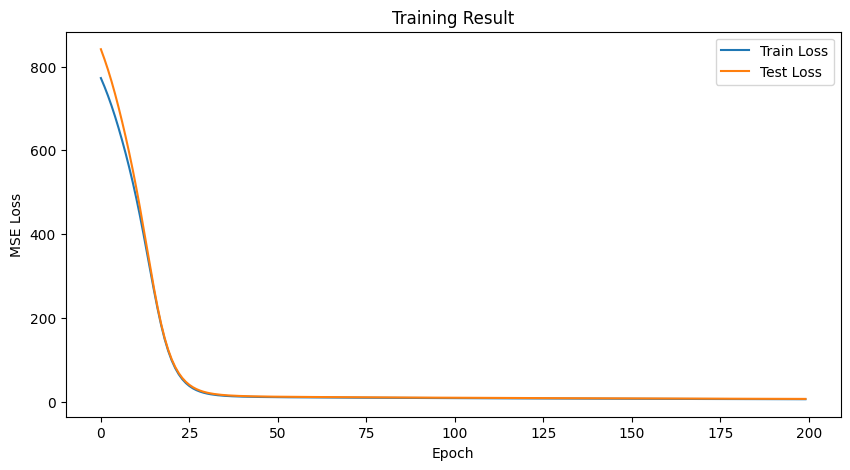

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="Train Loss")
plt.plot(np.arange(len(test_loss_list)), test_loss_list, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Result")
plt.legend(loc = "best")
plt.show()

## **최신화된 모델 매개변수 출력**

In [ ]:
min(test_loss_list)

np.float64(6.574438189114285)

In [ ]:
print(best_weight[0])
print(best_weight[1])

[[ 0.57681873  0.01331154]
 [ 1.21423617 -3.17335105]
 [ 0.45161846 -1.72627716]]
[[0.01575942]
 [4.74385495]]


## **최종 모델을 사용하여 결과 추론 진행**

In [ ]:
model.layer1_weights, model.layer2_weights = best_weight[0], best_weight[1]

In [ ]:
y_pred_nn = []

for sub_x_test in x_test :
  y_pred_nn.append(model.predict(sub_x_test)[0])

## **다중 선형 회귀 모델을 사용하여 결과 추론 진행**

In [ ]:
def get_param(x: np.array, y: np.array) :
  x_t = np.transpose(x)
  output = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_t, x)), x_t), y)

  return output

In [ ]:
beta_hat = get_param(x_train, y_train)

In [ ]:
beta_hat

array([-10.52381661, -18.61657071,   9.34255173])

In [ ]:
y_pred_lr = np.matmul(x_test, beta_hat).tolist()

## **두 모델 사이의 결과 비교**

### **MSE 손실 함수 계산**

In [ ]:
def MSELoss(y_pred:np.array, y_true:np.array)->float:
  return np.power(y_pred-y_true, 2).mean()

In [ ]:
print(f"Neural Network (NN) MSE Loss : {MSELoss(np.array(y_pred_nn), y_test)}")
print(f"Linear Regression (LR) MSE Loss : {MSELoss(np.array(y_pred_lr), y_test)}")

Neural Network (NN) MSE Loss : 6.803193102792273
Linear Regression (LR) MSE Loss : 63.68553963536155


### **그래프를 통한 정성적 결과 비교**

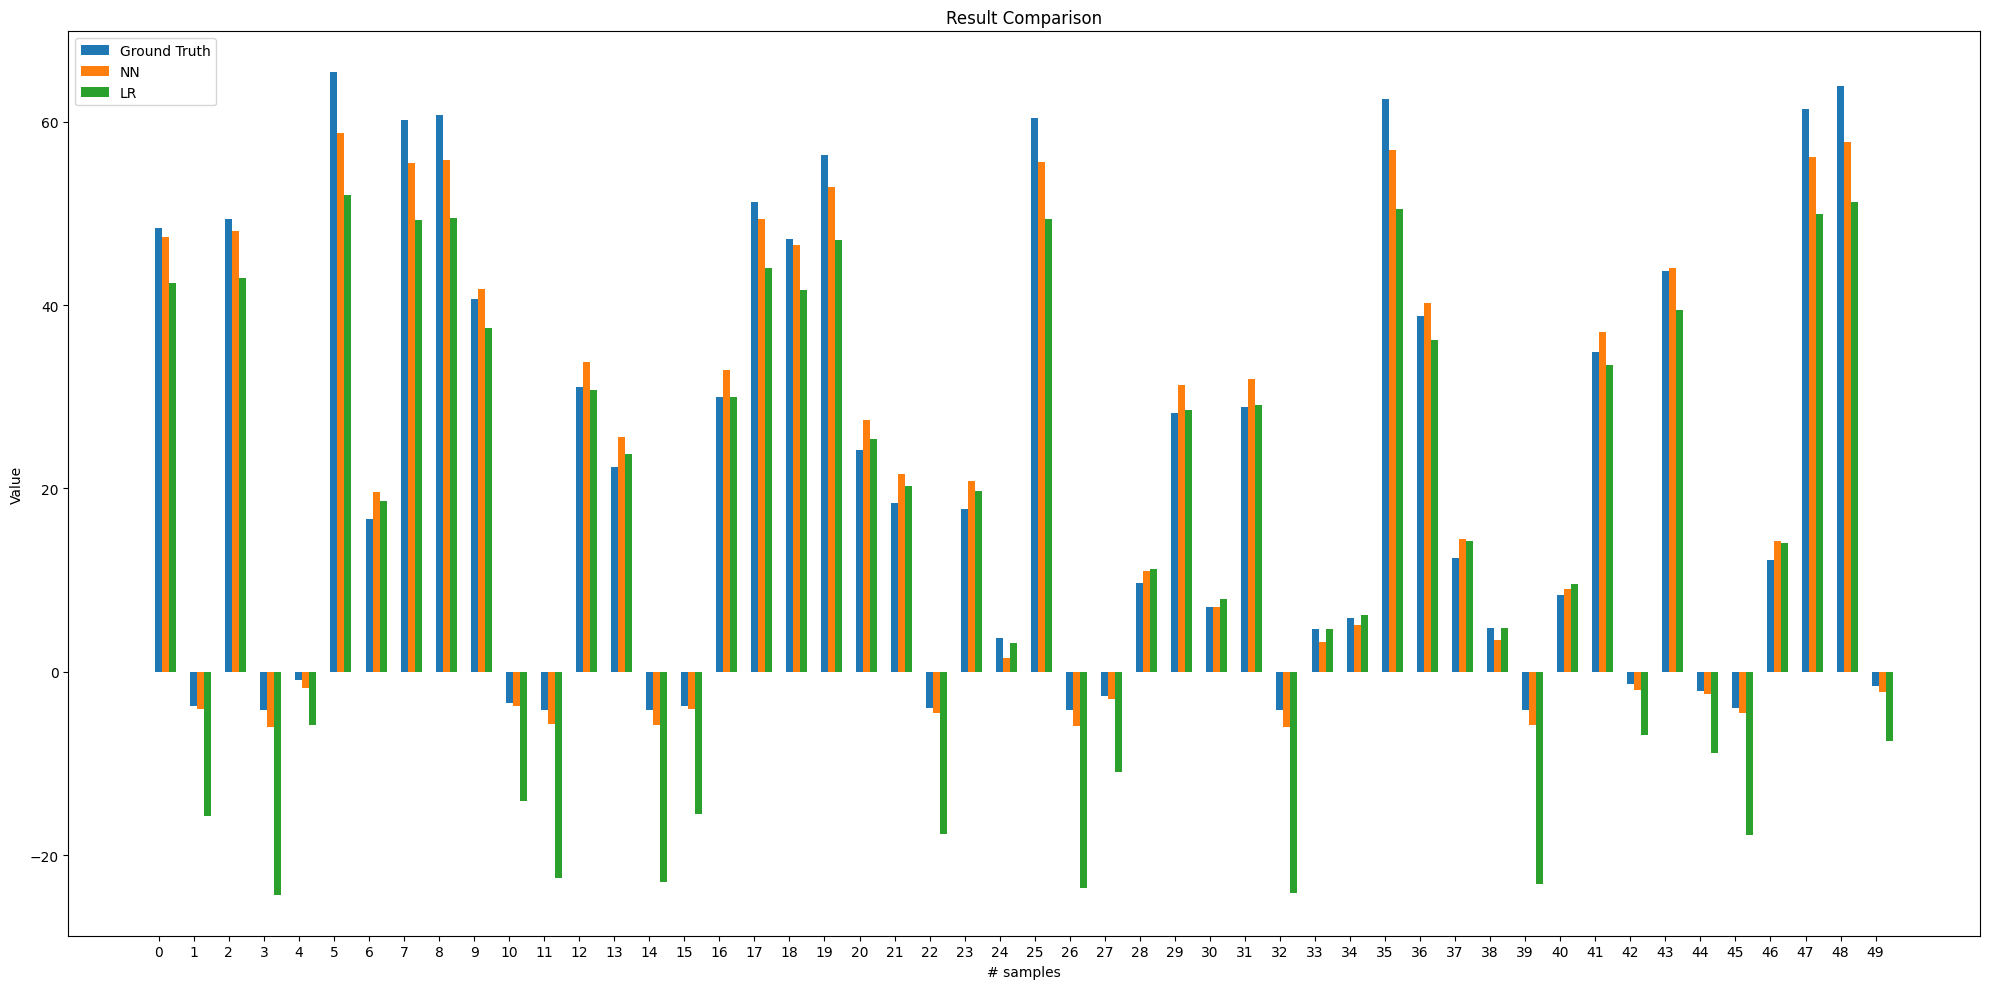

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
idx = np.asarray([i for i in range(50)])
width = 0.2

ax.bar(idx, y_test[:50], width = width)
ax.bar(idx+width, y_pred_nn[:50], width = width)
ax.bar(idx+2*width, y_pred_lr[:50], width = width)
ax.set_xticks(idx)
ax.legend(["Ground Truth", "NN", "LR"])
ax.set_xlabel("# samples")
ax.set_ylabel("Value")
ax.set_title("Result Comparison")

fig.tight_layout()
plt.show()